In [1]:
# Sequencial Gaussian Simulation

In [2]:
from volumetricspy.stats import Dot,CloudPoints, Exponential, NScaler, Spherical, SequentialGaussianSimulation
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance_matrix

In [3]:
#df = pd.read_csv('sample_data_biased.csv')     # load our data table
df2 = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data_biased.csv')
dcp2 = CloudPoints().from_df(df2, x='X',y='Y', fields=['Facies','Porosity','Perm'])
dcp2.df()

,x,y,z,crs,Facies,Porosity,Perm
0,100.0,900.0,None,None,1.0,0.115359,5.736104
1,100.0,800.0,None,None,1.0,0.136425,17.211462
2,100.0,600.0,None,None,1.0,0.135810,43.724752
3,100.0,500.0,None,None,0.0,0.094414,1.609942
4,100.0,100.0,None,None,0.0,0.113049,10.886001
...,...,...,...,...,...,...,...
284,190.0,199.0,None,None,1.0,0.109411,3.247265
285,190.0,419.0,None,None,0.0,0.099541,1.528003
286,920.0,379.0,None,None,0.0,0.094099,2.514597
287,60.0,149.0,None,None,0.0,0.100167,3.636854


<AxesSubplot:>

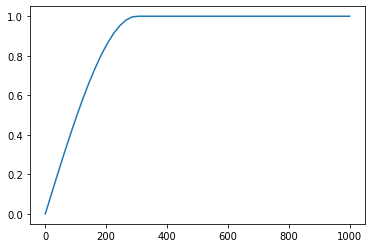

In [4]:
s = Spherical(
    sill = 1.,
    range = 300,
    nugget = 0.
)

s.plot(np.linspace(0,1000,50))

In [5]:
known = dcp2.sample(n=100)
sc = NScaler()
sc.fit(known.df()['Porosity'])
pnorm = sc.transform(known.df()['Porosity'])
known.add_field(pnorm, 'pnorm')
known.df()

,x,y,z,crs,Facies,Porosity,Perm,pnorm
0,60.0,659.0,None,None,1.0,0.134542,20.468460,0.408044
1,620.0,779.0,None,None,1.0,0.092645,1.607492,-1.196248
2,490.0,419.0,None,None,1.0,0.098454,2.881800,-0.947790
3,190.0,419.0,None,None,0.0,0.099541,1.528003,-0.907514
4,640.0,669.0,None,None,0.0,0.105467,1.389270,-0.679206
...,...,...,...,...,...,...,...,...
95,900.0,849.0,None,None,1.0,0.120992,3.005055,-0.069554
96,990.0,979.0,None,None,0.0,0.080575,0.595365,-1.822585
97,690.0,559.0,None,None,0.0,0.109998,4.750459,-0.485074
98,820.0,439.0,None,None,1.0,0.114396,9.869023,-0.312818


In [6]:
xn = np.linspace(0,1000,22)
yn = np.linspace(0,1000,22)

xx, yy = np.meshgrid(xn, yn)

dfun = pd.DataFrame({"x":xx.flatten(order='F'),"y":yy.flatten(order='F')})
cp2 = CloudPoints().from_df(dfun, x='x',y='y')


In [7]:
type(cp2)

volumetricspy.stats.points.CloudPoints

In [8]:
sgs = SequentialGaussianSimulation(
    variogram_model = s,
    known_cp = dcp2,
    unknown_cp = cp2
)

In [9]:
wm = sgs.forward('pnorm')

484 total points, 408 unknown points


In [10]:
df_un = wm.df()
df_un['porosity'] = sc.inverse(df_un['pnorm'])
df_un

,x,y,z,crs,pnorm,porosity
0,0.0,0.000000,None,None,-1.111890,0.094444
1,0.0,47.619048,None,None,-0.724636,0.104484
2,0.0,95.238095,None,None,-0.649021,0.106137
3,0.0,142.857143,None,None,-0.238766,0.116369
4,0.0,190.476190,None,None,-0.272681,0.115461
...,...,...,...,...,...,...
479,1000.0,809.523810,None,None,-0.051288,0.121497
480,1000.0,857.142857,None,None,-0.932504,0.098862
481,1000.0,904.761905,None,None,-0.806159,0.102456
482,1000.0,952.380952,None,None,-1.251021,0.091569


In [11]:
wm.add_fields_from_df(df_un, ['porosity'])

wm.df()

,x,y,z,crs,pnorm,porosity
0,0.0,0.000000,None,None,-1.111890,0.094444
1,0.0,47.619048,None,None,-0.724636,0.104484
2,0.0,95.238095,None,None,-0.649021,0.106137
3,0.0,142.857143,None,None,-0.238766,0.116369
4,0.0,190.476190,None,None,-0.272681,0.115461
...,...,...,...,...,...,...
479,1000.0,809.523810,None,None,-0.051288,0.121497
480,1000.0,857.142857,None,None,-0.932504,0.098862
481,1000.0,904.761905,None,None,-0.806159,0.102456
482,1000.0,952.380952,None,None,-1.251021,0.091569


/Users/scuervo91/Documents/dev/volumetricspy/volumetricspy/stats/points.py:228: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  d = ax.pcolormesh(xx,yy,df.values, **kwargs)
/Users/scuervo91/Documents/dev/volumetricspy/volumetricspy/stats/points.py:229: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(d)


<AxesSubplot:xlabel='x', ylabel='y'>

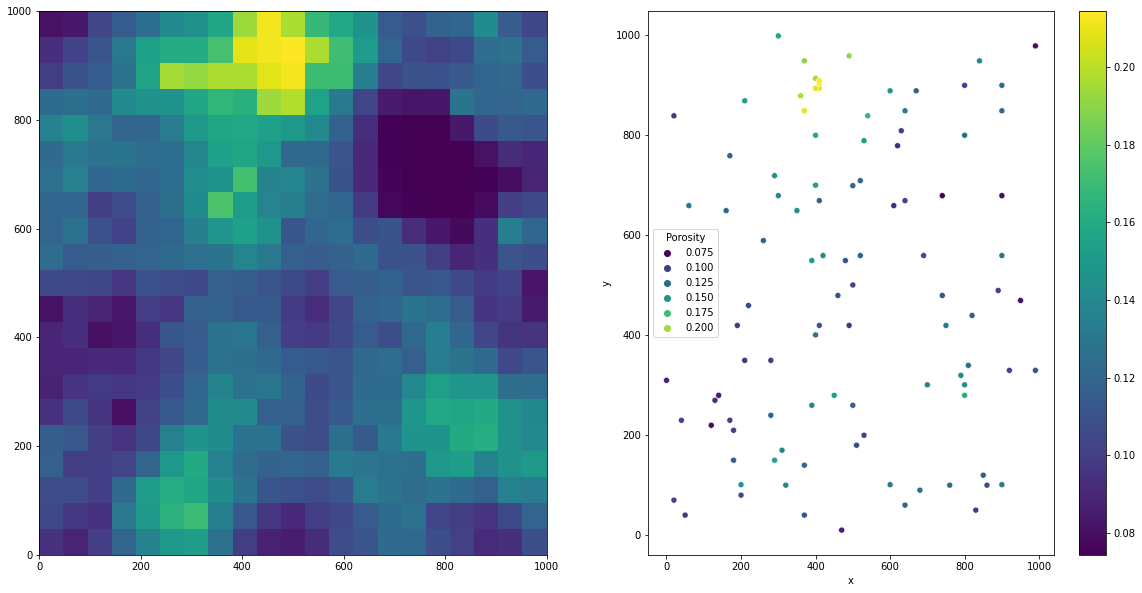

In [12]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
wm.plot_mesh('porosity',ax=ax[0])
known.plot(ax=ax[1], hue='Porosity', palette='viridis')

In [13]:
data=wm.df()
data.describe()

,x,y,pnorm,porosity
count,484.000000,484.000000,484.000000,484.000000
mean,500.000000,500.000000,-0.289884,0.119387
std,302.421570,302.421570,1.012391,0.026318
min,0.000000,0.000000,-6.361341,0.074349
25%,238.095238,238.095238,-0.825622,0.101877
50%,500.000000,500.000000,-0.196447,0.117513
75%,761.904762,761.904762,0.313453,0.131452
max,1000.000000,1000.000000,2.062396,0.214342


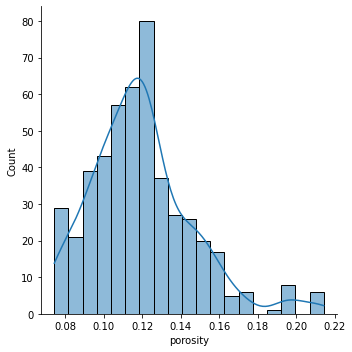

In [14]:
sns.displot(data=data.reset_index(), x='porosity', kde=True)

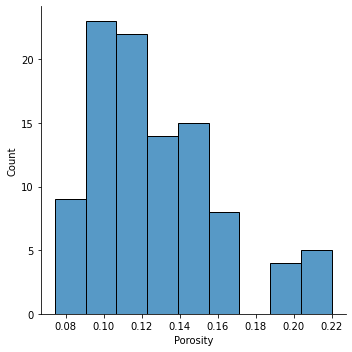

In [15]:
sns.displot(data=known.df().reset_index(), x='Porosity', kde=False)

In [16]:
wm.df().columns

Index(['x', 'y', 'z', 'crs', 'pnorm', 'porosity'], dtype='object')

<AxesSubplot:xlabel='lag', ylabel='var'>

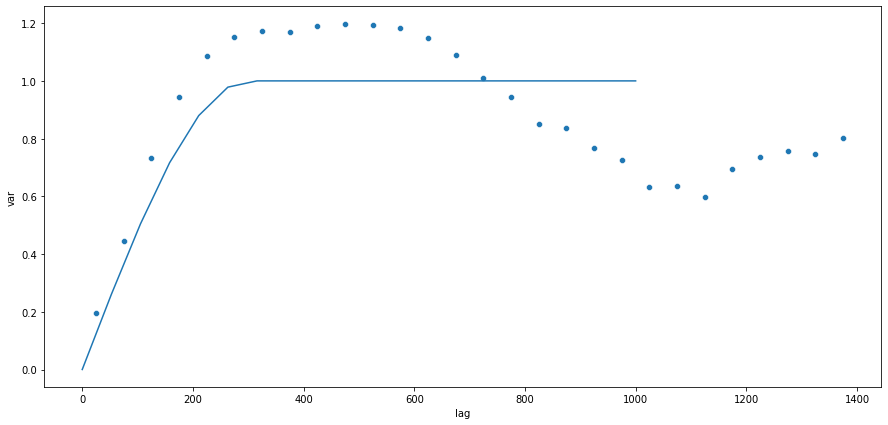

In [18]:
dfsm, sm = wm.variogram('pnorm',lag_dist=50, lag_tol=25,nlags=50)
fig, ax = plt.subplots(1,1,figsize=(15,7))

sns.scatterplot(data=sm, x='lag', y='var', ax=ax)
s.plot(np.linspace(0,1000,20),ax=ax)

In [19]:
wm.df()[['porosity','pnorm']].describe()

,porosity,pnorm
count,484.000000,484.000000
mean,0.119387,-0.289884
std,0.026318,1.012391
min,0.074349,-6.361341
25%,0.101877,-0.825622
50%,0.117513,-0.196447
75%,0.131452,0.313453
max,0.214342,2.062396
